In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
def f1(x):
    return x[0]

def f2(x):
    return 1 - (1/(4*np.pi**2))*(x[0]+np.pi)**2 + abs(x[1] - 5*np.cos(x[0]))**(1/3) + abs(x[2] - 5*np.sin(x[0]))**(1/3)

def outOfProperArea(coords):
    # warunki zgodne z tym, co jest w zadaniu
    if -np.pi > coords[0] or coords[0] > np.pi:
        return True
    if -5 > coords[1] or coords[1] > 5:
        return True
    if -5 > coords[2] or coords[2] > 5:
        return True

epsilon = 0.01 # na razie nie jest używany
nFunctions = 2

In [17]:
class Bird:
    def __init__(self, functionsList, nDim = 3, lowerLimit = -5, upperLimit = 5):
        self.loweLimit = lowerLimit
        self.upperLimit = upperLimit
        self.nDim = nDim
        self.functions = functionsList
        self.coords = self.initCoords()
        self.updateVals()
        
    def initCoords(self):
        return [random.uniform(-np.pi, np.pi)] + [random.uniform(self.loweLimit, self.upperLimit) for _ in range(self.nDim-1)]
    
    def updateVals(self):
        self.values = [fun(self.coords) for fun in self.functions]
        
    def getVals(self):
        return [fun(self.coords) for fun in self.functions]
        
    def __repr__(self):
        prec = int(np.ceil(-np.log10(epsilon)))
        return ', '.join(f' {item:.{prec}f}' if item > 0 else f'{item:.{prec}f}' for item in self.coords) + '     values: ' + ', '.join([f'{value:{prec}f}' for value in self.values])   
    
    def __getitem__(self, index):
        return self.coords[index]

In [38]:
n = 2048
nDim = 3
population = [Bird([f1,f2]) for _ in range(n)]

In [39]:
population[0]

 2.89, -1.44, -4.55     values: 2.888901, 3.378903

In [40]:
bestBird1 = min([[item.values[0], item] for item in population])[1]
bestBird2 = min([[item.values[1], item] for item in population])[1]
bestEvo = [[bestBird1, bestBird2]]

for k in tqdm(range(3000)):
    for bird in population:
        
        sigma = [max(abs(bird[dim]-bestBird1[dim]), abs(bird[dim]-bestBird2[dim])) for dim in range(nDim)]
        
        testCoords = [np.random.normal((bird[dim] + bestBird1[dim] + bestBird2[dim])/3, sigma[dim]) for dim in range(nDim)]
        
        if outOfProperArea(testCoords):
            continue
        
        testResults = [fun(testCoords) for fun in bird.functions]
        
        if [test <= current for test, current in zip(testResults, bird.values)] == [True, True]:
            bird.coords = testCoords
            bird.values = testResults
        
    bestBird1 = min([[item.values[0], item] for item in population])[1]
    bestBird2 = min([[item.values[1], item] for item in population])[1]
    bestEvo.append([bestBird1, bestBird2])

100%|██████████| 3000/3000 [05:53<00:00,  8.48it/s]


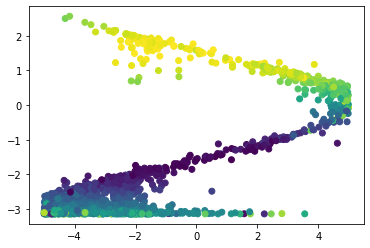

In [41]:
x = [bird[0] for bird in population]
y = [bird[1] for bird in population]
z = [bird[2] for bird in population]
plt.scatter(y, x, c = z)

In [54]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame([[bird[0], bird[1], bird[2]] for bird in population], columns=['x', 'y', 'z'])
px.scatter_3d(df, x='x', y='y', z='z', color='z')

In [43]:
import pickle

In [164]:
with open('./population.pickle', 'wb') as file:
    pickle.dump(population, file)

In [172]:
with open('./population.pickle', 'rb') as file:
    elo = pickle.load(file)

In [ ]:
[item.]

In [44]:
firstDim = [item[0] for item in population]
secondDim = [item[1] for item in population]
thirdDim = [item[2] for item in population]

(array([1319.,  250.,   55.,   48.,   29.,   54.,  130.,   76.,   66.,
          21.]),
 array([-3.14154541, -2.57130238, -2.00105934, -1.43081631, -0.86057327,
        -0.29033024,  0.2799128 ,  0.85015583,  1.42039887,  1.9906419 ,
         2.56088494]),
 <BarContainer object of 10 artists>)

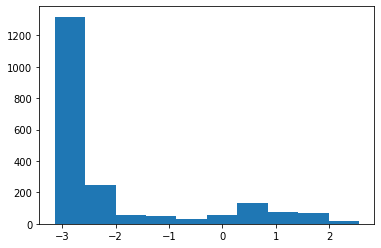

In [45]:
plt.hist(firstDim)

(array([703., 324., 390., 222.,  51.,  33.,  34.,  62.,  68., 161.]),
 array([-4.99975133e+00, -4.00049162e+00, -3.00123190e+00, -2.00197218e+00,
        -1.00271247e+00, -3.45275236e-03,  9.95806964e-01,  1.99506668e+00,
         2.99432640e+00,  3.99358611e+00,  4.99284583e+00]),
 <BarContainer object of 10 artists>)

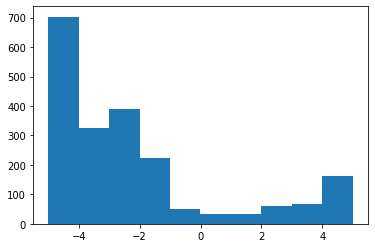

In [46]:
plt.hist(secondDim)

(array([168., 171., 191., 256., 507., 211., 128., 110., 139., 167.]),
 array([-4.98698924e+00, -3.98886247e+00, -2.99073570e+00, -1.99260893e+00,
        -9.94482157e-01,  3.64461351e-03,  1.00177138e+00,  1.99989815e+00,
         2.99802493e+00,  3.99615170e+00,  4.99427847e+00]),
 <BarContainer object of 10 artists>)

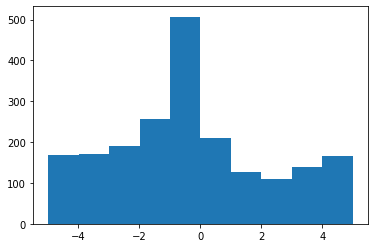

In [47]:
plt.hist(thirdDim)

In [50]:
min1 = min(firstDim)
min2 = min(secondDim)
min3 = min(thirdDim)
max1 = max(firstDim)
max2 = max(secondDim)
max3 = max(thirdDim)

(array([1319.,  250.,   55.,   48.,   29.,   54.,  130.,   76.,   66.,
          21.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

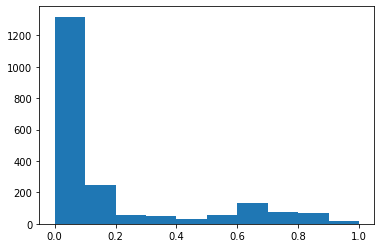

In [52]:
plt.hist([(item-min1)/(max1-min1) for item in firstDim])

In [56]:
firstVal = [item.values[0] for item in population]
secondVal = [item.values[1] for item in population]

plt.scatter(firstVal, secondVal)